In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [10]:
music = pd.read_csv("MusicDataset.csv")
music.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
music.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [12]:
music = music.drop(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name','explicit', 'loudness', 'mode', 
       'track_genre'], axis = 1)
music.describe

<bound method NDFrame.describe of         popularity  duration_ms  danceability  energy  key  speechiness  \
0               73       230666         0.676  0.4610    1       0.1430   
1               55       149610         0.420  0.1660    1       0.0763   
2               57       210826         0.438  0.3590    0       0.0557   
3               71       201933         0.266  0.0596    0       0.0363   
4               82       198853         0.618  0.4430    2       0.0526   
...            ...          ...           ...     ...  ...          ...   
113995          21       384999         0.172  0.2350    5       0.0422   
113996          22       385000         0.174  0.1170    0       0.0401   
113997          22       271466         0.629  0.3290    0       0.0420   
113998          41       283893         0.587  0.5060    7       0.0297   
113999          22       241826         0.526  0.4870    1       0.0725   

        acousticness  instrumentalness  liveness  valence    temp

In [13]:
music.isnull().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [14]:
music.head()

,popularity,duration_ms,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [15]:
x = music.drop(columns = 'valence')
x

,popularity,duration_ms,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature
0,73,230666,0.676,0.4610,1,0.1430,0.0322,0.000001,0.3580,87.917,4
1,55,149610,0.420,0.1660,1,0.0763,0.9240,0.000006,0.1010,77.489,4
2,57,210826,0.438,0.3590,0,0.0557,0.2100,0.000000,0.1170,76.332,4
3,71,201933,0.266,0.0596,0,0.0363,0.9050,0.000071,0.1320,181.740,3
4,82,198853,0.618,0.4430,2,0.0526,0.4690,0.000000,0.0829,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,0.2350,5,0.0422,0.6400,0.928000,0.0863,125.995,5
113996,22,385000,0.174,0.1170,0,0.0401,0.9940,0.976000,0.1050,85.239,4
113997,22,271466,0.629,0.3290,0,0.0420,0.8670,0.000000,0.0839,132.378,4
113998,41,283893,0.587,0.5060,7,0.0297,0.3810,0.000000,0.2700,135.960,4


In [16]:
y = music['valence']
y

0         0.7150
1         0.2670
2         0.1200
3         0.1430
4         0.1670
           ...  
113995    0.0339
113996    0.0350
113997    0.7430
113998    0.4130
113999    0.7080
Name: valence, Length: 114000, dtype: float64

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25, random_state = 88)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(85500, 11)
(28500, 11)
(85500,)
(28500,)


In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, Y_train)

LinearRegression()

In [21]:
c = lr.intercept_
c

-0.14358172963260085

In [22]:
m = lr.coef_
m

array([-8.84175089e-04, -2.39184388e-07,  6.65248971e-01,  3.47727207e-01,
        8.91219403e-04, -2.26682932e-01,  1.89020287e-01, -1.70926717e-01,
        3.27575608e-02,  5.50522568e-04,  2.22378932e-03])

In [23]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0.30740673, 0.65306609, 0.43247639, ..., 0.72171846, 0.65249736,
       0.39747467])

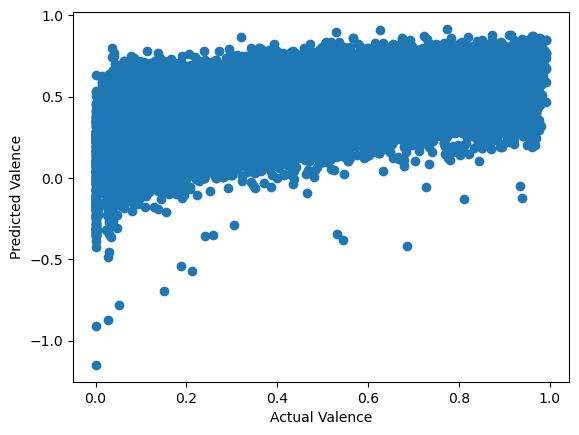

In [24]:
plt.scatter(Y_train, y_pred_train)
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence")
plt.show()

In [27]:
mse = mean_squared_error(Y_train, y_pred_train)
print("Mean squared error: ", mse)


Mean squared error:  0.042877761272968724


In [28]:
r2_score(Y_train, y_pred_train)

0.3621731916245481

## Random Forest

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.25, random_state = 267)

In [30]:
musicclf = RandomForestRegressor(n_estimators = 50, random_state = 5, oob_score = True)

In [31]:
musicclf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, oob_score=True, random_state=5)

In [32]:
predictions = musicclf.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
print("Mean squared error: ", mse)

r2 = r2_score(Y_test, predictions)
print("R-Square: ", r2)

Mean squared error:  0.023724638698007762
R-Square:  0.6455436704289643


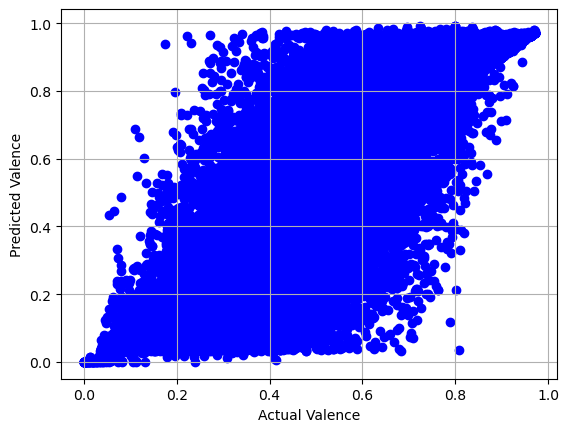

In [33]:
plt.scatter(predictions, Y_test, color = "blue")
plt.xlabel("Actual Valence")
plt.ylabel("Predicted Valence")
plt.grid()
plt.show()